In [23]:
# Use seborn for pairplot
!pip install seaborn==0.13.1
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [24]:
from __future__ import absolute_import, division, print_function

import pathlib
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.18.0


In [25]:
# Download the data set
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

### Import using Pandas

In [26]:
# Giving name to the coulmns
column_names = ["MPG","Cylinders","Displacement","Horsepower","Weight",
                "Acceleration", "Model Year", "Origin"]
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### clean the data

In [27]:
# Cleaning the data
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [28]:
# Drop the unknown
dataset = dataset.dropna()

### The **origin** column  is really categorical, not numeric. So convert it

In [29]:
## Converting into One-hot
origin = dataset.pop('Origin')

In [30]:
dataset["USA"] = (origin == 1)*1.0
dataset["Europe"] = (origin == 2)*1.0
dataset["Japan"] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [31]:
## Split the data into test and training data
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [32]:
# MAKE A COPY of train dataset
train_dataset_for_plotting = train_dataset.copy()

### Inspect the data
Have a quick look at the joint distribution of a few pairs of clumns from the training set.


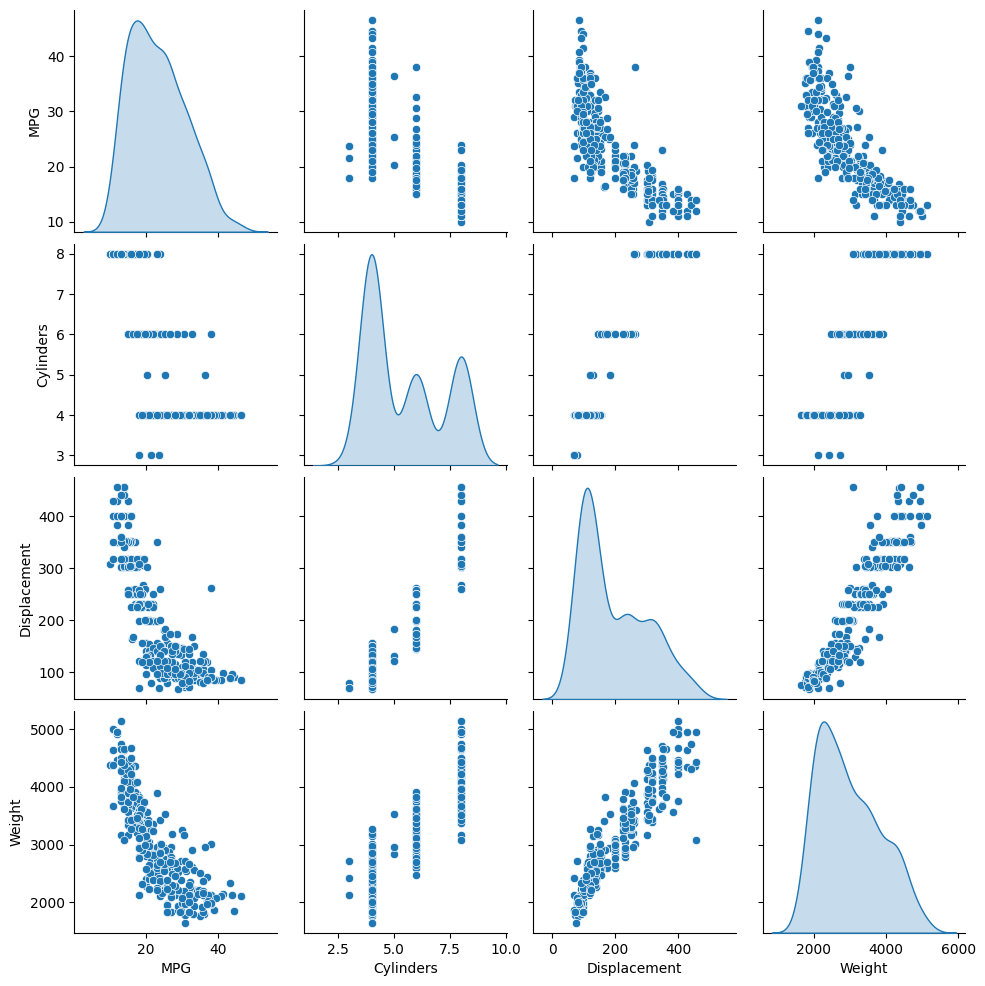

In [33]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

### Also look at the overall statistics:

In [34]:
# look at the statistics
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### Split features from labels
seperate the target value or label from the feature. This label is the value that will train the model to predict.

In [35]:
# Split feature from label
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

Normalize the data

In [36]:
# Normalize the data
def norm(x):
  return (x - train_stats["mean"]) / train_stats["std"]
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### Build the Model
lets's build our model. We'll use a sequential model with two densely connected hidden layer, and and output layer that returns a single, continuous value. The model building steps are wrapped in afunction, build_model

In [37]:
# Create a Model
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mae","mse"])
  return model

In [38]:
# Build the model
model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Try out the Model. Take a batch of 10 examples from training and test data
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[-0.37803924],
       [-0.2499147 ],
       [-0.6603918 ],
       [-0.4658534 ],
       [-0.22750202],
       [-0.24713133],
       [-0.22645001],
       [-0.2166626 ],
       [-0.15679207],
       [ 0.09007169]], dtype=float32)

### Train our model


In [41]:
# Display training progress by printing a single dot for rach completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

    EPOCHS = 100



In [44]:
 # Fit the model
history = model.fit(
        normed_train_data, train_labels,
        epochs=100, validation_split = 0.2, verbose=0,
        callbacks=[PrintDot()])




....................................................................................................

In [46]:
hist = pd.DataFrame(model.history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,4.899927,1.493147,4.899927,8.096406,2.164799,8.096406,95
96,4.821930,1.471316,4.821930,8.441245,2.268866,8.441245,96
97,4.666551,1.443859,4.666551,8.426286,2.136234,8.426286,97
98,4.834184,1.488720,4.834184,8.046855,2.208821,8.046855,98
99,4.710776,1.468810,4.710776,8.175950,2.211464,8.175950,99


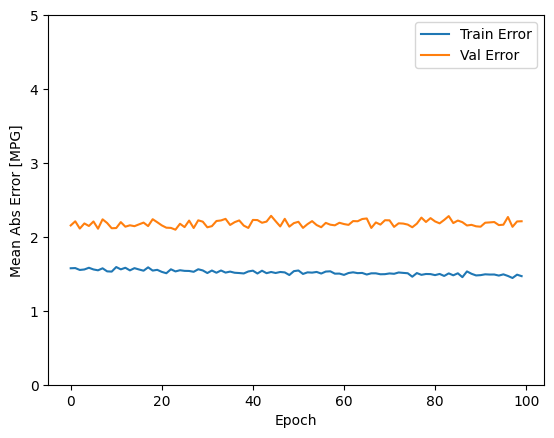

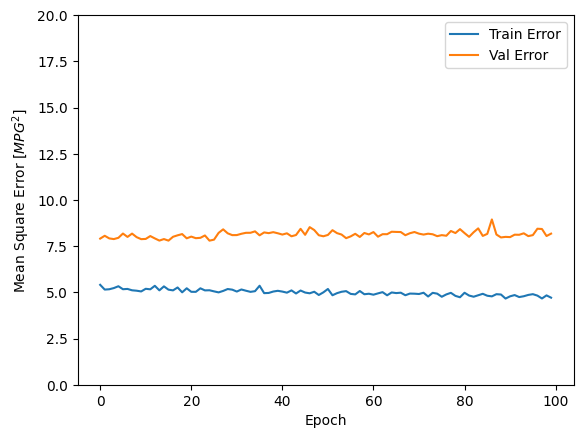

In [47]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Abs Error [MPG]")
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Square Error [$MPG^2$]")
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()

plot_history(history)

### use eraly stop

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


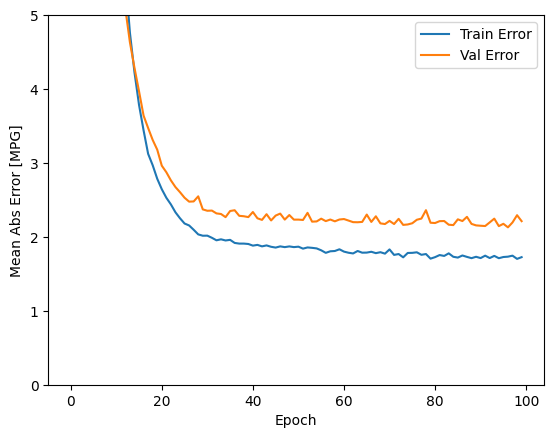

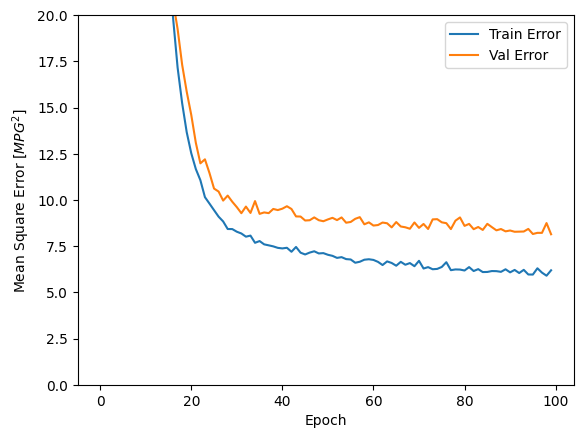

In [49]:
# We will use early stopping to improve
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

The graph shows on the validation set, the average error is usually around +/-2.
Let's see how well the model generalizes bybusing the test set, which we did not use when training the model.  

In [50]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - 22ms/step - loss: 5.4585 - mae: 1.8445 - mse: 5.4585
Testing set Mean Abs Error:  1.84 MPG


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


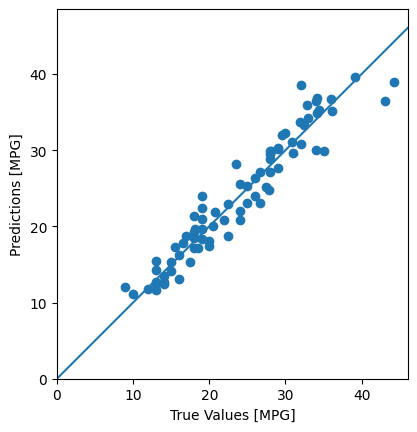

In [51]:
# Make prediction
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis("equal")
plt.axis("square")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

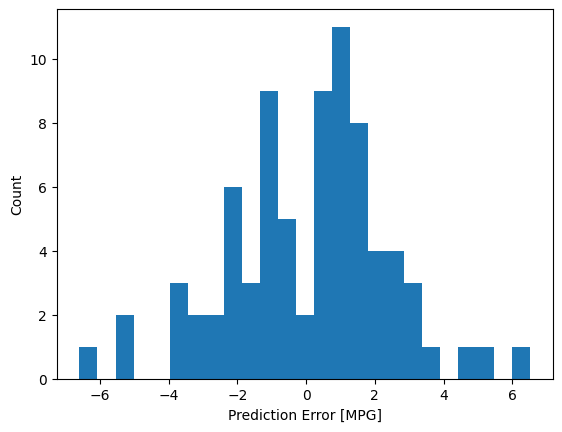

In [52]:
# It look like our model predicts resonably well. let's look at the error distribution
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

#### Conclusion
This notebook introduced a few techniques to handle a regression problem.
* Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
* Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
* Early stopping is a useful technique to prevent overfitting.